**Project Task**

   In this study, my task is to classify tumors into malignant (cancer) or benign using features obtained from several cell images.
   
   Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
   
   
**Attribute Information:**
   
1.  ID number 
2.  Diagnosis (M = malignant, B = benign) 

**Ten real-valued features are computed for each cell nucleus:**

1. Radius (mean of distances from center to points on the perimeter) 
2. Texture (standard deviation of gray-scale values) 
3. Perimeter 
4. Area 
5. Smoothness (local variation in radius lengths) 
6. Compactness (perimeter^2 / area - 1.0) 
7. Concavity (severity of concave portions of the contour) 
8. Concave points (number of concave portions of the contour) 
9. Symmetry 
10. Fractal dimension ("coastline approximation" - 1)




# Loading packages and data

# Import needed Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import Cancer data from the Sklearn library
# Dataset can also be found here:
# (http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

As we can see above, not much can be done in the current form of the dataset. We need to view the data in a better format.

# Let's view the data in a dataframe.

In [3]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


- mean radius = mean of distances from center to points on the perimeter
- mean texture = standard deviation of gray-scale values
- mean perimeter = mean size of the core tumor
- mean area = 
- mean smoothness = mean of local variation in radius lengths
- mean compactness = mean of perimeter^2 / area - 1.0
- mean concavity = mean of severity of concave portions of the contour
- mean concave points = mean for number of concave portions of the contour
- mean symmetry =
- mean fractal dimension = mean for "coastline approximation" - 1
- radius error = standard error for the mean of distances from center to points on the perimeter
- texture error = standard error for standard deviation of gray-scale values
- perimeter error =
- area error =
- smoothness error = standard error for local variation in radius lengths
- compactness error = standard error for perimeter^2 / area - 1.0
- concavity error = standard error for severity of concave portions of the contour
- concave points error = standard error for number of concave portions of the contour
- symmetry error =
- fractal dimension error = standard error for "coastline approximation" - 1
- worst radius = "worst" or largest mean value for mean of distances from center to points on the perimeter
- worst texture = "worst" or largest mean value for standard deviation of gray-scale values
- worst perimeter =
- worst smoothness = "worst" or largest mean value for local variation in radius lengths
- worst compactness = "worst" or largest mean value for perimeter^2 / area - 1.0
- worst concavity = "worst" or largest mean value for severity of concave portions of the contour
- worst concave points = "worst" or largest mean value for number of concave portions of the contour
- worst fractal dimension = "worst" or largest mean value for "coastline approximation" - 1

# Let's Explore Our Dataset

In [4]:
df_cancer.shape

(569, 31)

As we can see,we have 569 rows (Instances) and 31 columns(Features)

In [5]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Above is the name of each columns in our dataframe.

# The next step is to Visualize our data

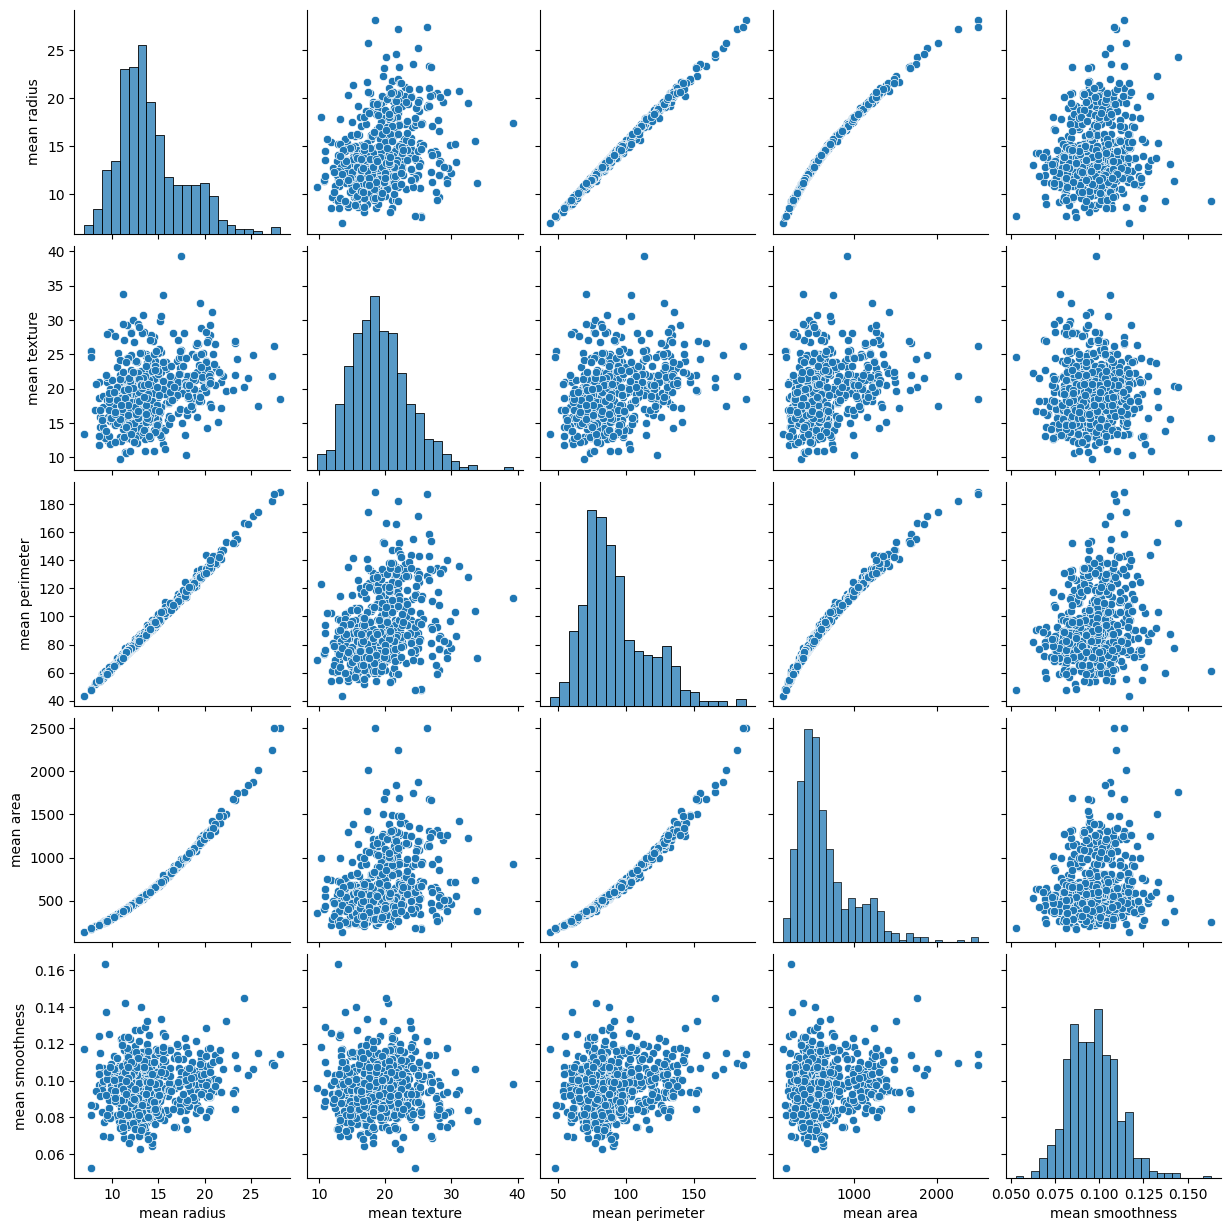

In [6]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'] )
plt.show()

The above plots shows the relationship between our features. But the only problem with them is that they do not show us which of the "dots" is Malignant and which is Benign. 

This issue will be addressed below by using "target" variable as the "hue" for the plots.

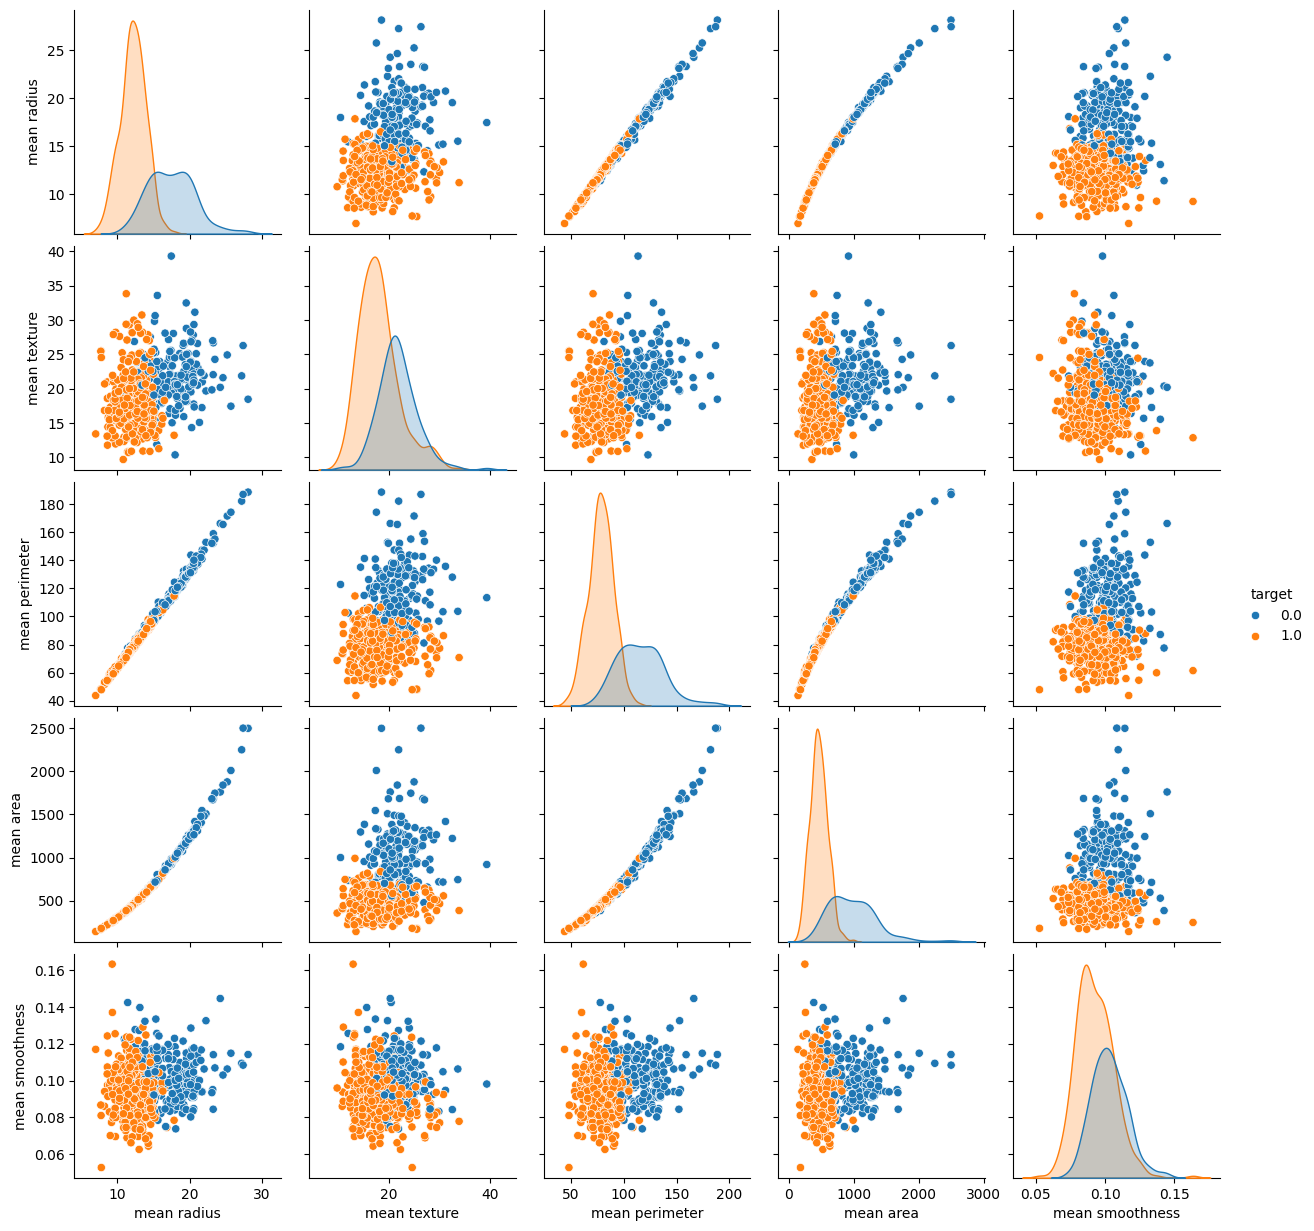

In [7]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] )
plt.show()

**Note:** 
    
  1.0 (Orange) = Benign (No Cancer)
  
  0.0 (Blue) = Malignant (Cancer)

# How many Benign and Malignant do we have in our dataset?

In [8]:
df_cancer['target'].value_counts()

target
1.0    357
0.0    212
Name: count, dtype: int64

As we can see, we have 212 - Malignant, and 357 - Benign

 Let's visulaize our counts

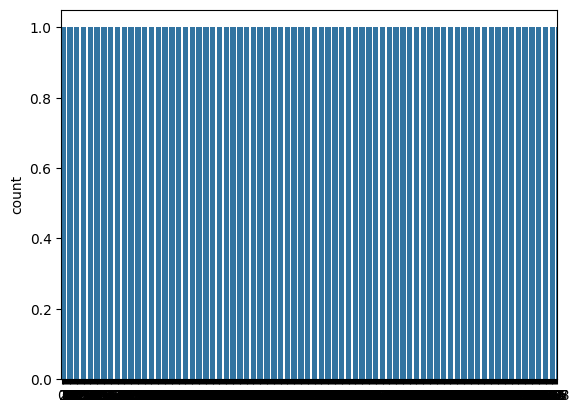

In [9]:
sns.countplot(df_cancer['target'], label = "Count") 
plt.show()

# Let's check the correlation between our features 

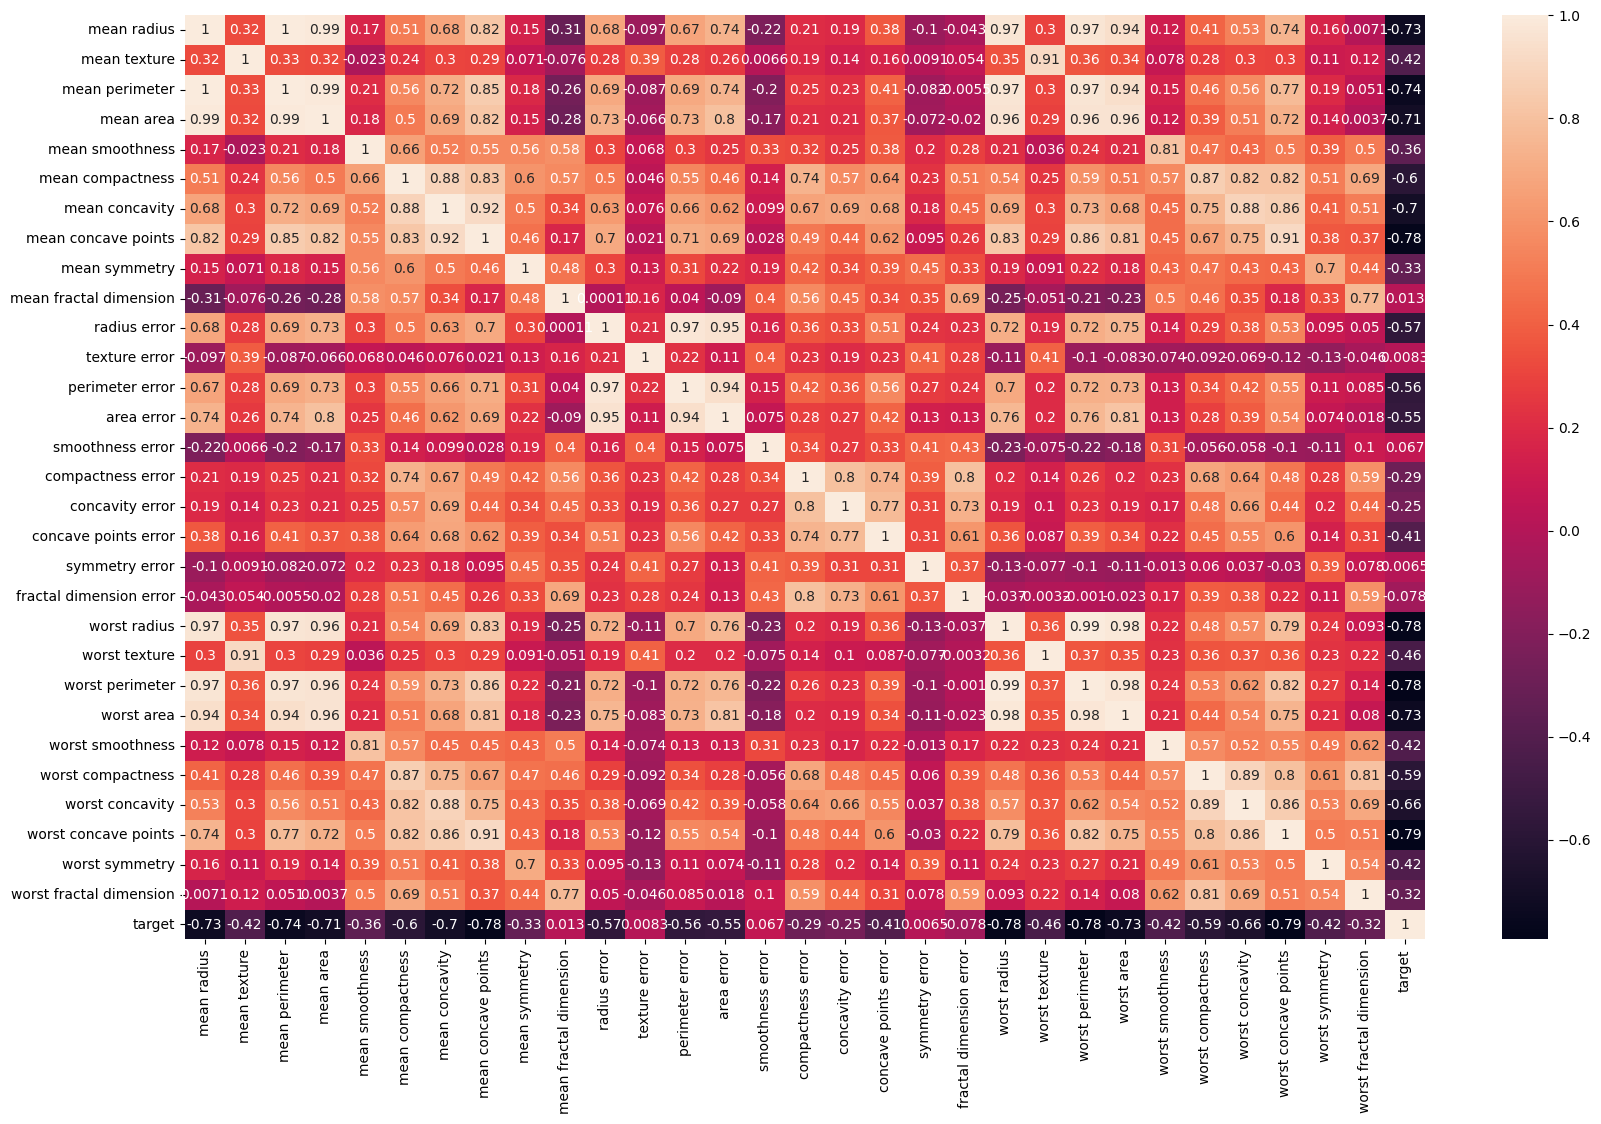

In [10]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df_cancer.corr(), annot=True) 
plt.show()

There is a strong correlation between the mean radius and mean perimeter, mean area and mean primeter

**In this project, we will be talking about a particular Machine Learning Model called Support Vector Machine (SVM)**

# Model Training

**From our dataset, let's create the target and predictor matrix**

- "y" = Is the feature we are trying to predict (Output). In this case we are trying to predict wheither our "target" is Cancer (Malignant) or not (Benign). I.e. we are going to use the "target" feature here.
- "X" = The predictors which are the remaining columns (mean radius, mean texture, mean perimeter, mean area, mean smoothness, etc)

In [11]:
X = df_cancer.drop(['target'], axis = 1) 
# We drop our "target" feature and use all the remaining 
# features in our dataframe to train the model.
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y = df_cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

# Create the training and testing data

Now that we've assigned values to our "X" and "y", the next step is to import the python library that will help us to split our dataset into training and testing data.

- Training data = Is the subset of our data used to train our model.
- Testing data =  Is the subset of our data that the model hasn't seen before. This is used to test the performance of our model.

In [13]:
from sklearn.model_selection import train_test_split

Let's split our data using 80% for training and the remaining 20% for testing.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

Let now check the size our training and testing data.

In [15]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (455, 30)
The size of our testing "X" (input features) is (114, 30)
The size of our training "y" (output feature) is (455,)
The size of our testing "y" (output features) is (114,)


# Import Support Vector Machine (SVM) Model 

In [16]:
from sklearn.svm import SVC

In [17]:
svc_model = SVC()

# Now, let's train our SVM model with our "training" dataset.

In [18]:
svc_model.fit(X_train, y_train)

SVC()

# Let's use our trained model to make a prediction using our testing data

In [19]:
y_predict = svc_model.predict(X_test)

**Next step is to check the accuracy of our prediction by comparing it to the output we already have (y_test). We are going to use confusion matrix for this comparison**

In [20]:
# Import metric libraries

from sklearn.metrics import confusion_matrix

In [21]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,8,40


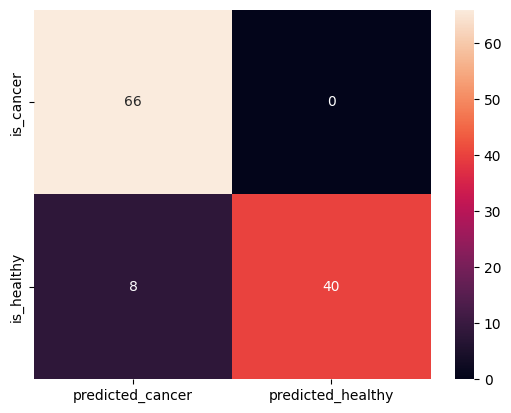

In [22]:
sns.heatmap(confusion, annot=True)
plt.show()

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9298245614035088

In [24]:
print('Wrong Predictions out of Total:')
print((y_test!=y_predict).sum(),'/',((y_test==y_predict).sum()+(y_test!=y_predict).sum()))

Wrong Predictions out of Total:
8 / 114


**As we can see, our model did not do a very good job in its predictions. It predicted that 8 healthy patients have cancer.**

**Let's explore ways to improve the performance of our model.**

# Improving our Model

The first process we will try is by Normalizing/Standarization our data:-

# Feature Scaling Training & Testing Data

In [25]:
#feature scaling using Standardization
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()

In [26]:
X_train_scaled= sc.fit_transform(X_train)

In [27]:
X_test_scaled=sc.transform(X_test)

In [28]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [29]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

# SVM with Normalized data

In [30]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,1,47


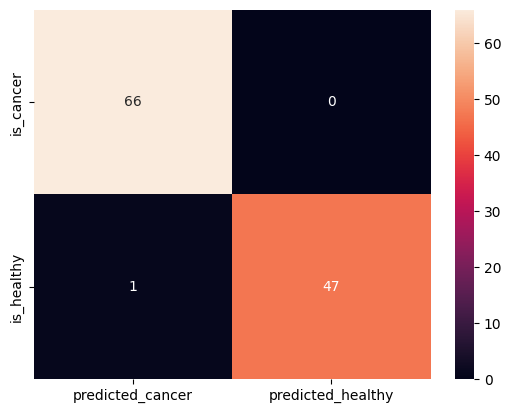

In [31]:
sns.heatmap(confusion,annot=True,fmt="d")
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9912280701754386

In [33]:
print('Wrong Predictions out of Total:')
print((y_test!=y_predict).sum(),'/',((y_test==y_predict).sum()+(y_test!=y_predict).sum()))

Wrong Predictions out of Total:
1 / 114


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[47,  1],
       [ 0, 66]])

### Precision & Recall:

In [36]:
from sklearn.metrics import precision_score, recall_score

In [37]:
precision_score(y_test,y_predict)

0.9850746268656716

In [38]:
recall_score(y_test,y_predict)

1.0

## F1-Score :

In [39]:
from sklearn.metrics import f1_score

In [40]:
f1_score(y_test,y_predict)

0.9924812030075187

<a id='searching'></a>
# Further Model Improvement
## Searching for the best hyperparameters

---

Let's see if we can improve on our model by searching for the best hyperparameters.

We would need to evaluate on the training data the set of hyperparameters that perform best, and then use this set of hyperparameters to fit the final model and score on the testing set.


# Gridsearch Model

In [41]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf','poly']} 

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [44]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.923 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.956 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.890 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.934 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.967 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

**Let's print out the "grid" with the best parameter**

In [45]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


SVC(C=10, gamma=0.01)


**As we can see, the best parameters are "C" = 10, "gamma" = "0.01" and "kernel" = 'rbf'**

In [46]:
grid_predictions = grid.predict(X_test_scaled)

In [47]:
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,1,47


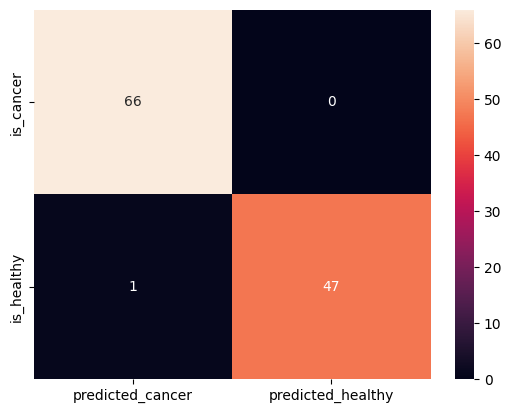

In [48]:
sns.heatmap(confusion, annot=True)
plt.show()

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,grid_predictions)

0.9912280701754386

In [50]:
print('Wrong Predictions out of Total:')
print((y_test!=grid_predictions).sum(),'/',((y_test==grid_predictions).sum()+(y_test!=grid_predictions).sum()))

Wrong Predictions out of Total:
1 / 114


**As we can see, our best model is SVM with Normalized data, followed by our Gridsearch model**

# Classification Report 

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

